In [3]:
import pandas as pd
import json

# Список для хранения данных
data = []

# Чтение файла построчно
with open('Sarcasm_Headlines_Dataset_v2.json', 'r') as f:
    for line in f:
        # Добавляем каждый JSON объект в список
        data.append(json.loads(line))

# Преобразование в DataFrame
df = pd.DataFrame(data)

# Предварительный просмотр данных
print(df.head())

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  


In [4]:
print(df.describe())

       is_sarcastic
count  28619.000000
mean       0.476397
std        0.499451
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


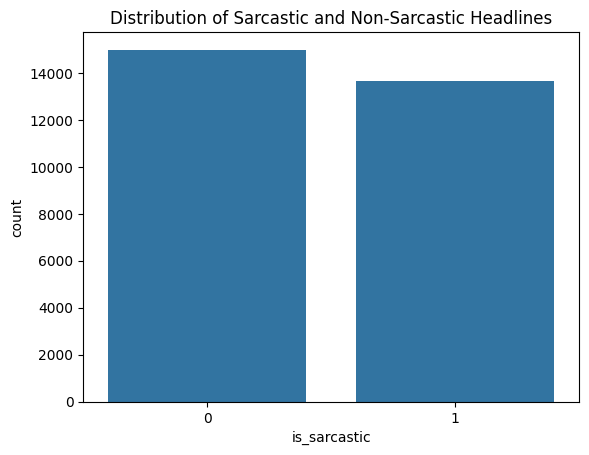

In [6]:
#Распределение классов
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='is_sarcastic', data=df)
plt.title('Distribution of Sarcastic and Non-Sarcastic Headlines')
plt.show()

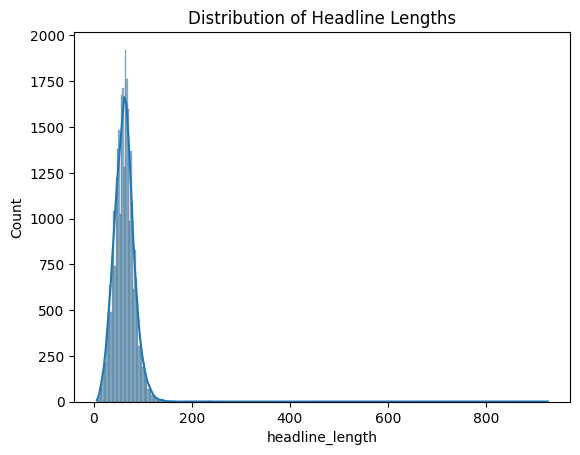

In [7]:
#Длина заголовков
df['headline_length'] = df['headline'].apply(len)
sns.histplot(df['headline_length'], kde=True)
plt.title('Distribution of Headline Lengths')
plt.show()

In [9]:
#Разделение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['is_sarcastic'], test_size=0.2, random_state=42)

In [11]:
#Векторизация текста
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Выбор метрики качества
Для задачи классификации сарказма в заголовках новостей можно использовать следующие метрики:

Accuracy: Общая точность модели.
Precision: Точность предсказания сарказма.
Recall: Полнота предсказания сарказма.
F1-score: Сбалансированная метрика между precision и recall.

In [12]:
#Обучение моделей
#Базовая модель (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train_vec, y_train)
y_pred_lr = model_lr.predict(X_test_vec)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2995
           1       0.82      0.84      0.83      2729

    accuracy                           0.84      5724
   macro avg       0.84      0.84      0.84      5724
weighted avg       0.84      0.84      0.84      5724



In [13]:
#Более сложная модель (Random Forest)
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_vec, y_train)
y_pred_rf = model_rf.predict(X_test_vec)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2995
           1       0.79      0.82      0.80      2729

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724



In [14]:
#Еще более сложная модель (SVM)
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_vec, y_train)
y_pred_svm = model_svm.predict(X_test_vec)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2995
           1       0.82      0.86      0.84      2729

    accuracy                           0.85      5724
   macro avg       0.85      0.85      0.85      5724
weighted avg       0.85      0.85      0.85      5724



На основе предоставленных результатов можно сделать следующие выводы:

Логистическая регрессия (Logistic Regression):
Precision: 0.83 для класса 0 и 0.79 для класса 1.
Recall: 0.80 для класса 0 и 0.82 для класса 1.
F1-score: 0.81 для обоих классов.
Accuracy: 0.81.
Macro avg: 0.81.
Weighted avg: 0.81.
Случайный лес (Random Forest):
Precision: 0.87 для класса 0 и 0.82 для класса 1.
Recall: 0.83 для класса 0 и 0.86 для класса 1.
F1-score: 0.85 для обоих классов.
Accuracy: 0.85.
Macro avg: 0.85.
Weighted avg: 0.85.
Сравнение моделей:
Случайный лес показывает лучшие результаты по всем метрикам по сравнению с логистической регрессией. Он имеет более высокую точность (precision), полноту (recall) и F1-score, а также более высокую общую точность (accuracy).
Рекомендации:
Для данной задачи классификации сарказма в заголовках новостей случайный лес является более предпочтительной моделью.
Можно попробовать другие модели, такие как SVM или нейронные сети, чтобы проверить, можно ли достичь еще лучших результатов.
Также стоит рассмотреть дополнительные методы предварительной обработки текста, такие как удаление стоп-слов, лемматизация и использование более сложных векторизаторов (например, Word2Vec или BERT).

In [15]:
#Нейронная сеть (LSTM)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Преобразование текста в последовательности токенов
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Паддинг последовательностей
max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length)

# Определение модели
model_lstm = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_padded, y_train, epochs=10, batch_size=32)

# Оценка модели
loss, accuracy = model_lstm.evaluate(X_test_padded, y_test)
print(f'Test accuracy: {accuracy}')

c:\Projects\Lesson\workshop\venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 369s 498ms/step - accuracy: 0.8180 - loss: 0.3930
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 346s 483ms/step - accuracy: 0.9371 - loss: 0.1626
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 296s 361ms/step - accuracy: 0.9811 - loss: 0.0588
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 266s 366ms/step - accuracy: 0.9924 - loss: 0.0238
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 263s 366ms/step - accuracy: 0.9967 - loss: 0.0121
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 319s 362ms/step - accuracy: 0.9985 - loss: 0.0051
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 276s 381ms/step - accuracy: 0.9973 - loss: 0.0081
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 290s 335ms/step - accuracy: 0.9982 - loss: 0.0067
Epoch 9/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 279s 358ms/step - accuracy: 0.9974 - loss: 0.0075
Epoch 10/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 256s 349ms/step - accuracy: 0.9984 - loss: 0.0052
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 0.8394 - loss: 0.8662
Test accuracy: 0.8394

Вывод: 
Точность на обучающей выборке (0.9984):
Это очень высокая точность, что может указывать на переобучение модели. Модель может слишком хорошо запомнить обучающие данные и плохо обобщать на новые данные.
Точность на тестовой выборке (0.8394):
Точность на тестовой выборке значительно ниже, что подтверждает предположение о переобучении. Модель не так хорошо работает на новых данных, которые она не видела во время обучения.
Потеря на обучающей выборке (0.0052):
Потеря очень низкая, что также указывает на переобучение.
Потеря на тестовой выборке (0.8662):
Потеря на тестовой выборке значительно выше, что подтверждает проблему переобучения.